In [ ]:


import tensorflow as tf
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.fashion_mnist.load_data()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

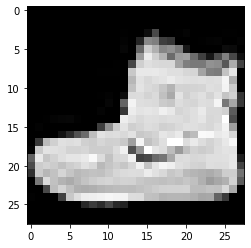

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0],cmap='gray')
plt.show()

In [ ]:
print(y_train[:10])

[9 0 0 3 0 2 7 2 5 5]


In [ ]:
class_names=['티셔츠/윗도리','바지','스웨터','드레스','코트','샌들','셔츠','스니커즈','가방','앵클부츠']

In [ ]:
print(class_names[y_train[1]])

티셔츠/윗도리


In [ ]:
import numpy as np
import pandas as pd
np.bincount(y_train)

array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,stratify=y_train,test_size=0.2,random_state=42)

In [ ]:
np.bincount(y_train)

array([4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800])

In [ ]:
#표준화
x_train=x_train/255
x_val=x_val/255

In [ ]:
x_train=x_train.reshape(-1,784)
x_val=x_val.reshape(-1,784)

In [ ]:
tf.keras.utils.to_categorical([0,1,3])

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.]], dtype=float32)

In [ ]:
#원 핫 인코딩
y_train_encoded=tf.keras.utils.to_categorical(y_train)
y_val_encoded=tf.keras.utils.to_categorical(y_val)

In [ ]:
y_train_encoded.shape

(48000, 10)

In [ ]:
y_train_encoded[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
model=Sequential()
model.add(Dense(100,activation='sigmoid',input_shape=(784,)))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(x_train,y_train_encoded,epochs=40,validation_data=(x_val,y_val_encoded))

Epoch 1/40
1500/1500 [==============================] - 4s 3ms/step - loss: 1.7289 - accuracy: 0.5247 - val_loss: 0.9549 - val_accuracy: 0.7268
Epoch 2/40
1500/1500 [==============================] - 4s 3ms/step - loss: 0.8842 - accuracy: 0.7360 - val_loss: 0.7479 - val_accuracy: 0.7589
Epoch 3/40
1500/1500 [==============================] - 4s 2ms/step - loss: 0.7243 - accuracy: 0.7598 - val_loss: 0.6634 - val_accuracy: 0.7768
Epoch 4/40
1500/1500 [==============================] - 3s 2ms/step - loss: 0.6575 - accuracy: 0.7744 - val_loss: 0.6115 - val_accuracy: 0.7934
Epoch 5/40
1500/1500 [==============================] - 3s 2ms/step - loss: 0.6110 - accuracy: 0.7915 - val_loss: 0.5760 - val_accuracy: 0.8027
Epoch 6/40
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5812 - accuracy: 0.8005 - val_loss: 0.5513 - val_accuracy: 0.8110
Epoch 7/40
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5479 - accuracy: 0.8136 - val_loss: 0.5293 - val_accuracy:

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


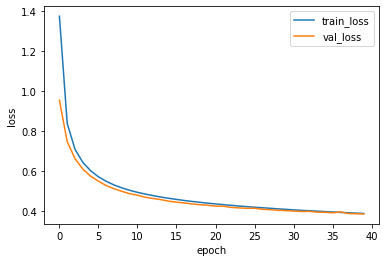

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'])
plt.show()

In [ ]:
loss,accuracy=model.evaluate(x_val,y_val_encoded,verbose=0)
accuracy

0.8622499704360962

In [ ]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

In [ ]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.fashion_mnist.load_data()
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,stratify=y_train,test_size=0.2,random_state=42)
y_train_encoded=tf.keras.utils.to_categorical(y_train)
y_val_encoded=tf.keras.utils.to_categorical(y_val)
y_test_encoded=tf.keras.utils.to_categorical(y_test)
x_train=x_train.reshape(-1,28,28,1)
x_val=x_val.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)

x_train=x_train/255
x_val=x_val/255
x_test=x_test/255

conv1=tf.keras.Sequential()
conv1.add(Conv2D(10,(3,3),activation='relu',padding='same',input_shape=(28,28,1)))
conv1.add(MaxPooling2D((2,2)))
conv1.add(Flatten())
conv1.add(Dropout(0.5))
conv1.add(Dense(100,activation='relu'))
conv1.add(Dense(10,activation='softmax'))
conv1.summary()

conv1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=conv1.fit(x_train,y_train_encoded,epochs=20,validation_data=(x_val,y_val_encoded))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 10)        100       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 1960)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1960)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               196100    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 197,210
Trainable params: 197,210
Non-trainable params: 0
________________________________________________

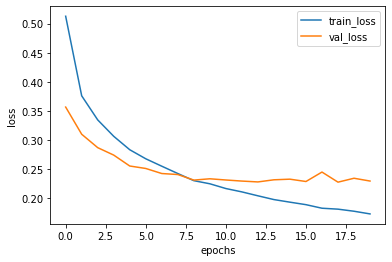

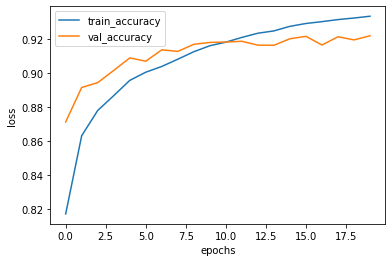

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train_loss','val_loss'])
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train_accuracy','val_accuracy'])
plt.show()

In [ ]:
from tensorflow.keras.datasets import imdb
(x_train,y_train),(x_test,y_test)=imdb.load_data(skip_top=20,num_words=100)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [ ]:
x_train.shape

(25000,)

In [ ]:
x_train[0]

[2,
 2,
 22,
 2,
 43,
 2,
 2,
 2,
 2,
 65,
 2,
 2,
 66,
 2,
 2,
 2,
 36,
 2,
 2,
 25,
 2,
 43,
 2,
 2,
 50,
 2,
 2,
 2,
 35,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 39,
 2,
 2,
 2,
 2,
 2,
 2,
 38,
 2,
 2,
 2,
 2,
 50,
 2,
 2,
 2,
 2,
 2,
 2,
 22,
 2,
 2,
 2,
 2,
 2,
 22,
 71,
 87,
 2,
 2,
 43,
 2,
 38,
 76,
 2,
 2,
 2,
 2,
 22,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 62,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 66,
 2,
 33,
 2,
 2,
 2,
 2,
 38,
 2,
 2,
 25,
 2,
 51,
 36,
 2,
 48,
 25,
 2,
 33,
 2,
 22,
 2,
 2,
 28,
 77,
 52,
 2,
 2,
 2,
 2,
 82,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 36,
 71,
 43,
 2,
 2,
 26,
 2,
 2,
 46,
 2,
 2,
 2,
 2,
 2,
 2,
 88,
 2,
 2,
 2,
 2,
 98,
 32,
 2,
 56,
 26,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 22,
 21,
 2,
 2,
 26,
 2,
 2,
 2,
 30,
 2,
 2,
 51,
 36,
 28,
 2,
 92,
 25,
 2,
 2,
 2,
 65,
 2,
 38,
 2,
 88,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 32,
 2,
 2,
 2,
 2,
 2,
 32]

In [ ]:
for i in range(len(x_train)):
  x_train[i]=[w for w in x_train[i] if w>2]
print(x_train[0])

[22, 43, 65, 66, 36, 25, 43, 50, 35, 39, 38, 50, 22, 22, 71, 87, 43, 38, 76, 22, 62, 66, 33, 38, 25, 51, 36, 48, 25, 33, 22, 28, 77, 52, 82, 36, 71, 43, 26, 46, 88, 98, 32, 56, 26, 22, 21, 26, 30, 51, 36, 28, 92, 25, 65, 38, 88, 32, 32]


In [ ]:
word_to_index=imdb.get_word_index()
word_to_index['movie']

1646592/1641221 [==============================] - 0s 0us/step


17

In [ ]:
index_to_word={word_to_index[k]: k for k in word_to_index}
for w in x_train[0]:
  print(index_to_word[w-3],end=' ')

film just story really they you just there an from so there film film were great just so much film would really at so you what they if you at film have been good also they were just are out because them all up are film but are be what they have don't you story so because all all 

In [ ]:
np.random.seed(42)
random_index=np.random.permutation(25000)
x_train1=x_train[random_index[:20000]]
y_train1=y_train[random_index[:20000]]
x_val=x_train[random_index[20000:]]
y_val=y_train[random_index[20000:]]

In [ ]:
from tensorflow.keras.preprocessing import sequence
maxlen=100
x_train_seq=sequence.pad_sequences(x_train1,maxlen=maxlen)
x_val_seq=sequence.pad_sequences(x_val,maxlen=maxlen)

In [ ]:
x_train_seq.shape

(20000, 100)

In [ ]:
from tensorflow.keras.utils import to_categorical
x_train_onehot=to_categorical(x_train_seq)
x_val_onehot=to_categorical(x_val_seq)
x_train_onehot.shape

(20000, 100, 100)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN

model=Sequential()
model.add(SimpleRNN(32,input_shape=(100,100)))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 32)                4256      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 4,289
Trainable params: 4,289
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(x_train_onehot,y_train1,epochs=20,batch_size=32,validation_data=(x_val_onehot,y_val))

Epoch 1/20
625/625 [==============================] - 13s 20ms/step - loss: 0.7054 - accuracy: 0.5005 - val_loss: 0.6972 - val_accuracy: 0.5090
Epoch 2/20
625/625 [==============================] - 12s 19ms/step - loss: 0.6952 - accuracy: 0.5106 - val_loss: 0.6941 - val_accuracy: 0.5190
Epoch 3/20
625/625 [==============================] - 12s 20ms/step - loss: 0.6915 - accuracy: 0.5270 - val_loss: 0.6922 - val_accuracy: 0.5314
Epoch 4/20
625/625 [==============================] - 12s 19ms/step - loss: 0.6891 - accuracy: 0.5400 - val_loss: 0.6884 - val_accuracy: 0.5348
Epoch 5/20
625/625 [==============================] - 12s 19ms/step - loss: 0.6804 - accuracy: 0.5618 - val_loss: 0.6652 - val_accuracy: 0.5964
Epoch 6/20
625/625 [==============================] - 12s 20ms/step - loss: 0.6642 - accuracy: 0.6024 - val_loss: 0.6344 - val_accuracy: 0.6424
Epoch 7/20
625/625 [==============================] - 12s 20ms/step - loss: 0.6434 - accuracy: 0.6325 - val_loss: 0.6177 - val_accuracy:

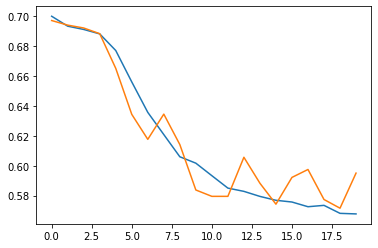

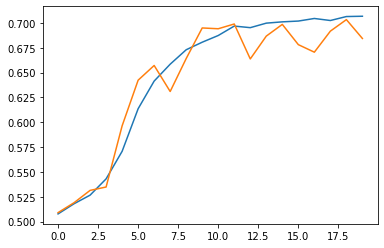

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [ ]:
loss,accuracy=model.evaluate(x_val_onehot,y_val,verbose=0)

In [ ]:
print(accuracy)

0.6844000220298767
